# Cross selling of insurance policies

AssurePredict is a leading insurance company that specializes in providing innovative risk management solutions. This project aims to create a predictive model that can identify potential cross-selling opportunities for existing customers, identifying those who might be interested in purchasing an additional policy for their vehicle.

## Exploratory Data Analysis (EDA)

This section provides a comprehensive EDA, including:
- Dataset overview and data types
- Target variable distribution and class imbalance
- Categorical and numerical feature analysis vs target
- Outlier detection
- Feature distributions by target
- Statistical tests for feature associations
- Feature interactions and high-cardinality feature analysis

In [15]:
# Import core libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, chi2_contingency

# Set plot style
sns.set_theme(style='whitegrid')
ds = pd.read_csv('insurance_cross_sell.csv')

In [16]:
# Dataset overview
print('Dataset shape:', ds.shape)
ds.info()
ds.head()

Dataset shape: (381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [17]:
# Check for missing values
print('Missing values per column:')
print(ds.isnull().sum())

Missing values per column:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


Count by class:
Response
0    334399
1     46710
Name: count, dtype: int64
Percentage by class:
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


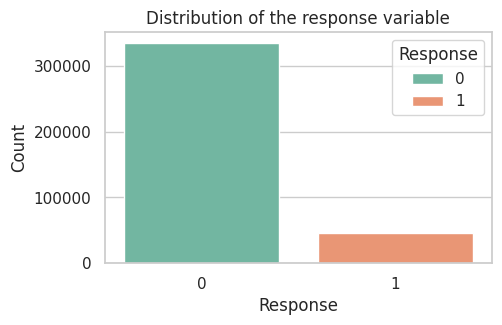

In [18]:
# Target variable distribution
response_counts = ds['Response'].value_counts()
response_pct = ds['Response'].value_counts(normalize=True)
print('Count by class:')
print(response_counts)
print('Percentage by class:')
print(response_pct)

plt.figure(figsize=(5,3))
sns.countplot(x='Response', data=ds, palette='Set2', hue='Response')
plt.title('Distribution of the response variable')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

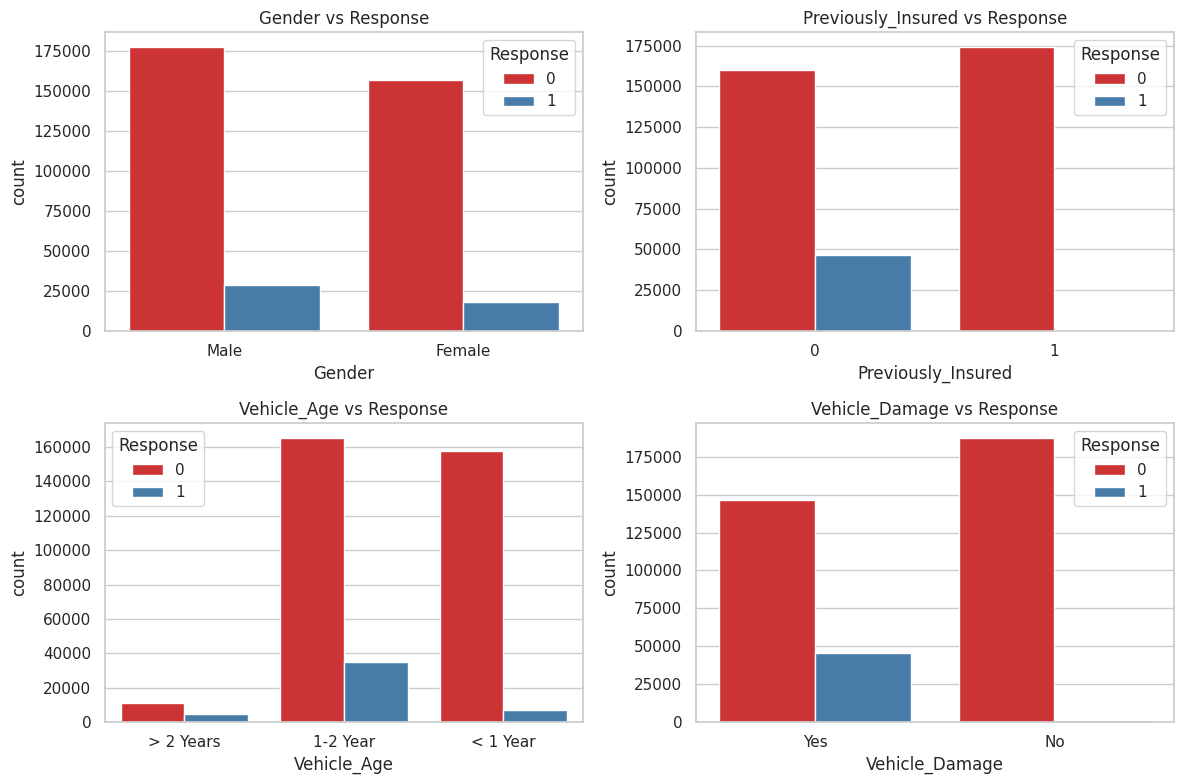

In [19]:
# Categorical variables vs Response
cat_vars = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for ax, var in zip(axes.flatten(), cat_vars):
    sns.countplot(x=var, hue='Response', data=ds, ax=ax, palette='Set1')
    ax.set_title(f'{var} vs Response')
    ax.legend(title='Response')
plt.tight_layout()
plt.show()

In [20]:
# Chi-squared test for categorical features
for var in cat_vars:
    ct = pd.crosstab(ds[var], ds['Response'])
    chi2, p, _, _ = chi2_contingency(ct)
    print(f"{var}: p-value = {p:.4f}")

Gender: p-value = 0.0000
Previously_Insured: p-value = 0.0000
Vehicle_Age: p-value = 0.0000
Vehicle_Damage: p-value = 0.0000


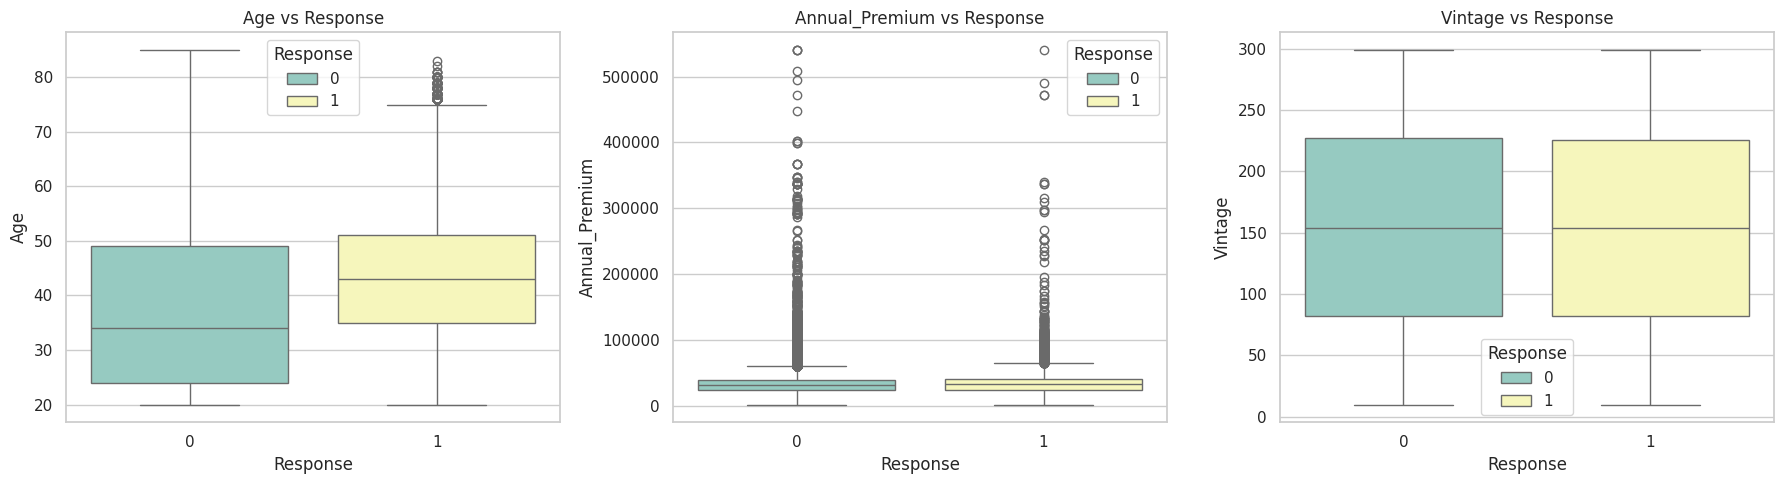

In [21]:
# Numerical variables vs Response
num_vars = ['Age', 'Annual_Premium', 'Vintage']
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, var in zip(axes, num_vars):
    sns.boxplot(x='Response', y=var, data=ds, ax=ax, palette='Set3', hue='Response')
    ax.set_title(f'{var} vs Response')
plt.tight_layout()
plt.show()

In [22]:
# Outlier detection using z-score
outliers = (np.abs(ds[num_vars].apply(zscore)) > 3).sum()
print('Number of outliers per feature:')
print(outliers)

Number of outliers per feature:
Age                  0
Annual_Premium    2083
Vintage              0
dtype: int64


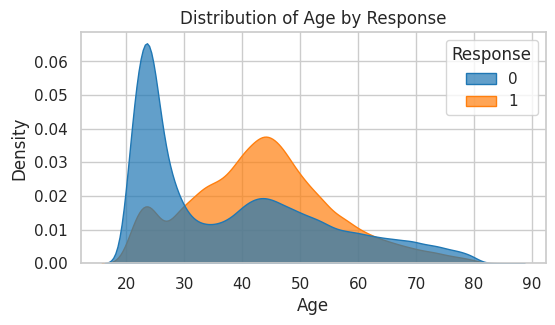

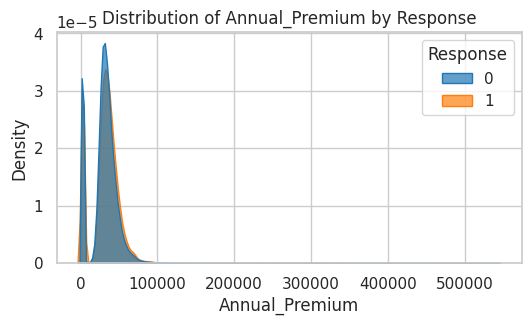

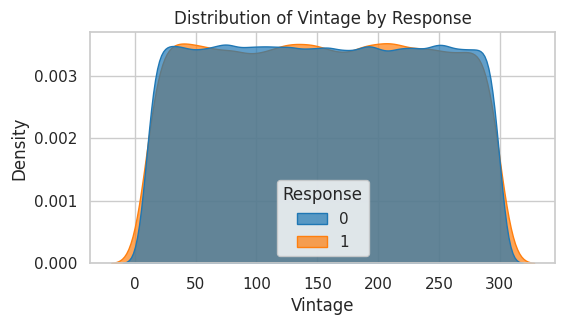

In [23]:
# Feature distributions by Response
for var in num_vars:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=ds, x=var, hue='Response', fill=True, common_norm=False, palette='tab10', alpha=0.7)
    plt.title(f'Distribution of {var} by Response')
    plt.show()

In [24]:
# Group statistics for numerical features by Response
group_stats = ds.groupby('Response')[num_vars].agg(['mean', 'median', 'std'])
display(group_stats)

Age                   Annual_Premium                         \
               mean median        std           mean   median           std   
Response                                                                      
0         38.178227   34.0  15.816052   30419.160276  31504.0  16998.293197   
1         43.435560   43.0  12.168924   31604.092742  33002.0  18646.508040   

             Vintage                    
                mean median        std  
Response                                
0         154.380243  154.0  83.661975  
1         154.112246  154.0  83.738574

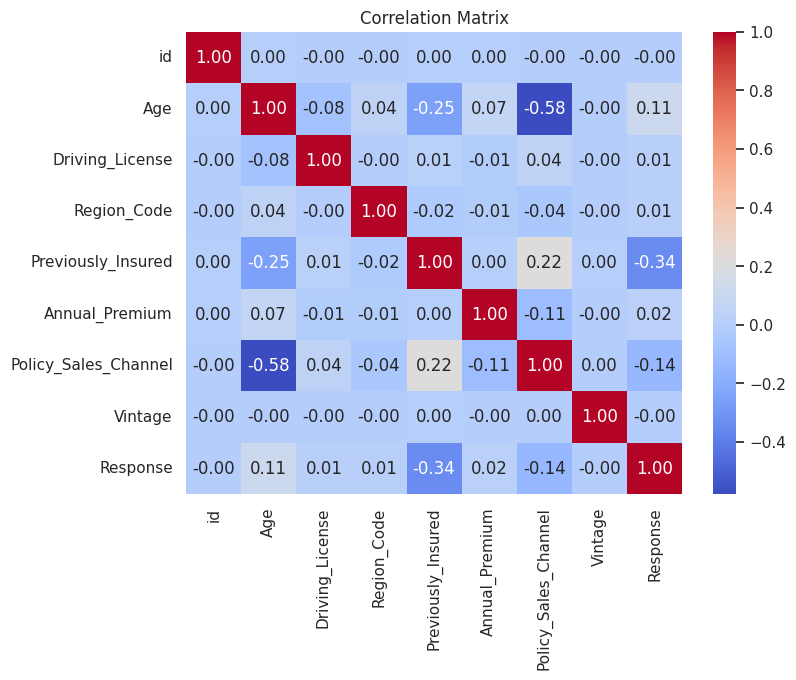

In [25]:
# Correlation matrix
corr = ds.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

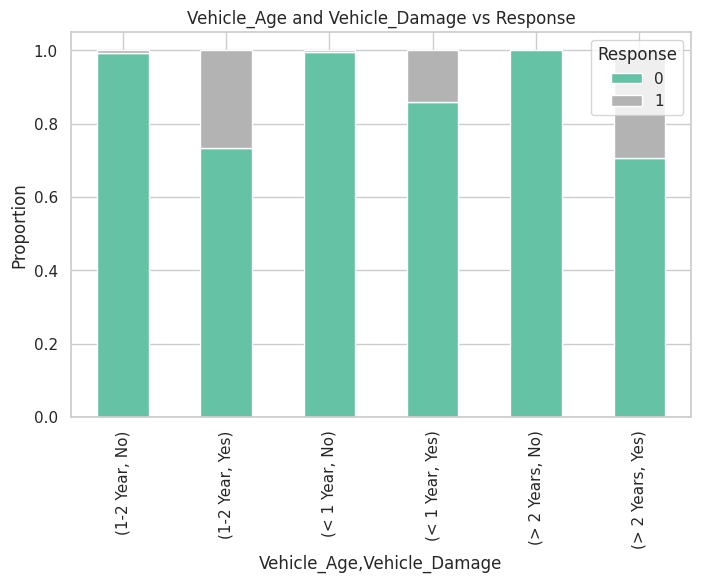

In [26]:
# Feature interaction: Vehicle_Age vs Vehicle_Damage by Response
ct = pd.crosstab([ds['Vehicle_Age'], ds['Vehicle_Damage']], ds['Response'], normalize='index')
ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
plt.title('Vehicle_Age and Vehicle_Damage vs Response')
plt.ylabel('Proportion')
plt.show()

In [27]:
# Top Region_Code and Policy_Sales_Channel by Response rate
region_response = ds.groupby('Region_Code')['Response'].mean().sort_values(ascending=False)
channel_response = ds.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False)
print('Top 5 Regions by Response rate:')
print(region_response.head())
print('\nTop 5 Channels by Response rate:')
print(channel_response.head())

Top 5 Regions by Response rate:
Region_Code
38.0    0.192004
28.0    0.187163
19.0    0.162866
4.0     0.158245
23.0    0.153061
Name: Response, dtype: float64

Top 5 Channels by Response rate:
Policy_Sales_Channel
43.0     1.000000
123.0    1.000000
28.0     0.333333
27.0     0.333333
36.0     0.326923
Name: Response, dtype: float64


### EDA Results Commentary

- The target variable `Response` is highly imbalanced, with the majority of customers not interested in cross-selling offers.
- Categorical features such as `Previously_Insured`, `Vehicle_Damage`, and `Vehicle_Age` show statistically significant associations with the target (confirmed by chi-squared tests). Customers who have not been previously insured and those with a history of vehicle damage are more likely to respond positively.
- Numerical features (`Age`, `Annual_Premium`, `Vintage`) show some differences between classes, but their distributions overlap considerably. Outlier analysis reveals a few extreme values, especially in `Annual_Premium`, but these do not dominate the distribution.
- The correlation matrix indicates low linear correlation among numerical features, suggesting multicollinearity is not a concern.
- Feature interaction analysis (e.g., `Vehicle_Age` and `Vehicle_Damage`) highlights subgroups with higher response rates.
- Certain regions and sales channels have notably higher response rates, which could be leveraged for targeted marketing or segmentation.

These findings provide a solid foundation for feature engineering and model development, with attention to class imbalance and the most predictive features identified during EDA.

## Feature Engineering

This section performs feature engineering to prepare the data for modeling. Steps include encoding categorical variables, scaling numerical features, and preparing the final dataset for model training.

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature lists
num_features = ['Age', 'Annual_Premium', 'Vintage']
bin_features = ['Gender', 'Previously_Insured', 'Vehicle_Damage']
ord_features = ['Vehicle_Age']
high_card_features = ['Region_Code', 'Policy_Sales_Channel']

# Ordinal mapping for Vehicle_Age
vehicle_age_map = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
ds['Vehicle_Age_Ordinal'] = ds['Vehicle_Age'].map(vehicle_age_map)

# Binary encoding for Gender, Previously_Insured, Vehicle_Damage
bin_map = {'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0}
ds['Gender_bin'] = ds['Gender'].map({'Male': 1, 'Female': 0})
ds['Vehicle_Damage_bin'] = ds['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
# Previously_Insured is already binary (0/1)

# One-hot encoding for high-cardinality features
ds = pd.get_dummies(ds, columns=['Region_Code', 'Policy_Sales_Channel'], drop_first=True)

# Final feature set
feature_cols = ['Age', 'Annual_Premium', 'Vintage', 'Gender_bin', 'Previously_Insured', 'Vehicle_Damage_bin', 'Vehicle_Age_Ordinal'] + \
    [col for col in ds.columns if col.startswith('Region_Code_') or col.startswith('Policy_Sales_Channel_')]

# Create feature matrix and target vector
X = ds[feature_cols].copy()  # Create a copy to avoid SettingWithCopyWarning
y = ds['Response']

# Convert numerical features to float64 before scaling
X[num_features] = X[num_features].astype('float64')

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X[num_features])
X[num_features] = pd.DataFrame(scaled_features, columns=num_features, index=X.index)

print('Feature engineering completed. Feature matrix shape:', X.shape)
display(X.head())

Feature engineering completed. Feature matrix shape: (381109, 213)


,Age,Annual_Premium,Vintage,Gender_bin,Previously_Insured,Vehicle_Damage_bin,Vehicle_Age_Ordinal,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,0.333777,0.574539,0.748795,1,0,1,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.396751,0.172636,0.342443,1,0,0,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.527181,0.449053,-1.521998,1,0,1,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.148985,-0.113018,0.581474,1,1,0,0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,-0.633242,-0.178259,-1.378580,0,1,0,0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
